In [8]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fname_list = ["c1.txt", "c2.txt"]
content = list()


for fname in fname_list:
    with open(fname) as f:
        content_temp = f.readlines()
    content.append([x.split() for x in content_temp])

In [4]:
from collections import Counter
def calculate_metric_ctr(split1, split2, split_size):
    split1_clicked = Counter()
    split2_clicked = Counter()
    for line1, line2 in zip(split1, split2):
        split1_clicked[str(set(line1))]+=1
        split2_clicked[str(set(line2))]+=1
    #number of clicked/ number of non clicked
    ctr_split1 = (abs(list(split1_clicked.values())[0] - list(split1_clicked.values())[1]))/split_size
    ctr_split2 = (abs(list(split2_clicked.values())[0] - list(split2_clicked.values())[1]))/split_size
    return ctr_split1, ctr_split2

In [5]:
def calculate_metric_average(split1, split2):
    return split1.mean(), split2.mean()

In [6]:
def t_criterion(split_1, split_2, t_importance = 1.96):
    t_value = abs(split_1.mean() - split_2.mean()) / \
        np.sqrt((split_1.var(ddof = 1) / float(split_1.shape[0])) + (split_2.var(ddof = 1) / float(split_2.shape[0])))
                  
    return (1 if (t_value > t_importance) else 0)

In [7]:
SPLIT_SIZE = 1000
TOTAL_NUMBER = len(content[0])
content = list([np.array(content[0]).astype(np.int32), np.array(content[1]).astype(np.int32)])
seed = np.random.seed(10)
TOTAL_NUMBER_OF_ITER = 10

n_CTR = 0
n_AV = 0
N = TOTAL_NUMBER_OF_ITER
for step in range(10):
    ctr1_list = list()
    ctr2_list = list()
    
    av1_list = list()
    av2_list = list()
    for i in range(TOTAL_NUMBER//SPLIT_SIZE):

        temp_index_list_1 = np.random.choice(len(content[0]), SPLIT_SIZE)
        temp_index_list_2 = np.random.choice(len(content[1]), SPLIT_SIZE)
        
        split_1 = content[0][temp_index_list_1]
        split_2 = content[1][temp_index_list_2]
        ctr1, ctr2 = calculate_metric_ctr(split_1, split_2, SPLIT_SIZE)
        av1, av2 = calculate_metric_average(split_1, split_2)
        ctr1_list.append(ctr1)
        ctr2_list.append(ctr2)
        av1_list.append(av1)
        av2_list.append(av2)
    sys.stderr.write("Мы на шаге: {}\n".format(step))
    n_CTR += t_criterion(np.array(ctr1_list), np.array(ctr2_list))
    n_AV += t_criterion(np.array(av1_list), np.array(av2_list))
print("ASL with CTR {}".format(n_CTR/N))
print("ASL with average {}".format(n_AV/N))

Мы на шаге: 0
Мы на шаге: 1
Мы на шаге: 2
Мы на шаге: 3
Мы на шаге: 4
Мы на шаге: 5
Мы на шаге: 6
Мы на шаге: 7
Мы на шаге: 8


ASL with CTR 1.0
ASL with average 1.0


Мы на шаге: 9


# Получили, что в обоих случаях мы имеем основание отвергнуть гипотезу о том, что разница в сплитах обусловлена шумами.

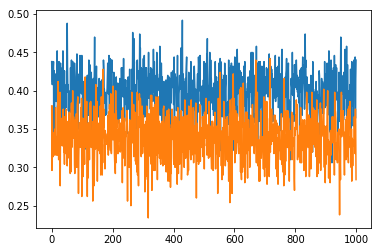

In [9]:
plt.plot(ctr1_list)
plt.plot(ctr2_list)
plt.show()

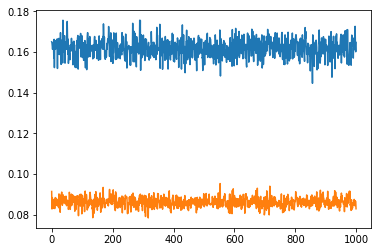

In [10]:
plt.plot(av1_list)
plt.plot(av2_list)
plt.show()